In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def detect_and_frame_faces(img):
    face_img = img.copy()
    face_cascade = cv2.CascadeClassifier(
        cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    face_rects = face_cascade.detectMultiScale(
        face_img, scaleFactor=1.2, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in face_rects:
        cv2.rectangle(face_img, (x, y), (x+w, y+h), (255, 255, 255), 3)
        roi = face_img[y:y+h, x:x+w]
        blurr = cv2.medianBlur(roi, 1)
        face_img[y:y+h, x:x+w] = blurr

    return face_img

In [6]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    frame = detect_and_frame_faces(frame)
    cv2.imshow('blur', frame)
    k = cv2.waitKey(1)
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

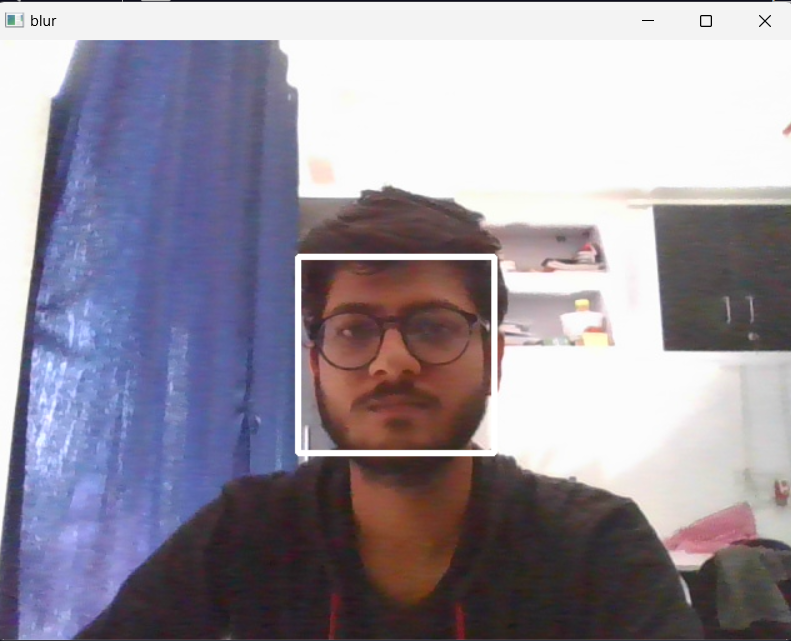